In [2]:
import math
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# OUR LIBRARIES / FUNCTIONS
from ImageLoader import load_image, plot_loaded_images
from StarDetector import get_hough_circles, plot_detected_stars, get_stars_data, get_blobs, get_blobs_data
from StarMatching import calculate_transformation, estimate_line, estimate_transformation, get_star_matches, get_line_pts

# GLOBAL VARIABLES
# im1_path = r'Stars/IMG_3048.HEIC'
# im2_path = r'Stars/IMG_3049.HEIC'
im1_path = "Ex1_test_101/fr1.jpg"
im2_path = "Ex1_test_101/fr2.jpg"

In [3]:
im1 = load_image(im1_path)
im2 = load_image(im2_path)

In [4]:
# Set threshold and maxValue
thresh = 130
maxValue = 255

# Basic threshold example
th1, im1_bin = cv2.threshold(im1, thresh, maxValue, cv2.THRESH_BINARY)
th2, im2_bin = cv2.threshold(im2, thresh, maxValue, cv2.THRESH_BINARY)

In [5]:
keypoints1 = get_blobs(im1_bin)
keypoints2 = get_blobs(im2_bin)
print(f"Image1 number of keypoints: {len(keypoints1)}\n"
      f"Image2 number of keypoints: {len(keypoints2)}")

Image1 number of keypoints: 29
Image2 number of keypoints: 25


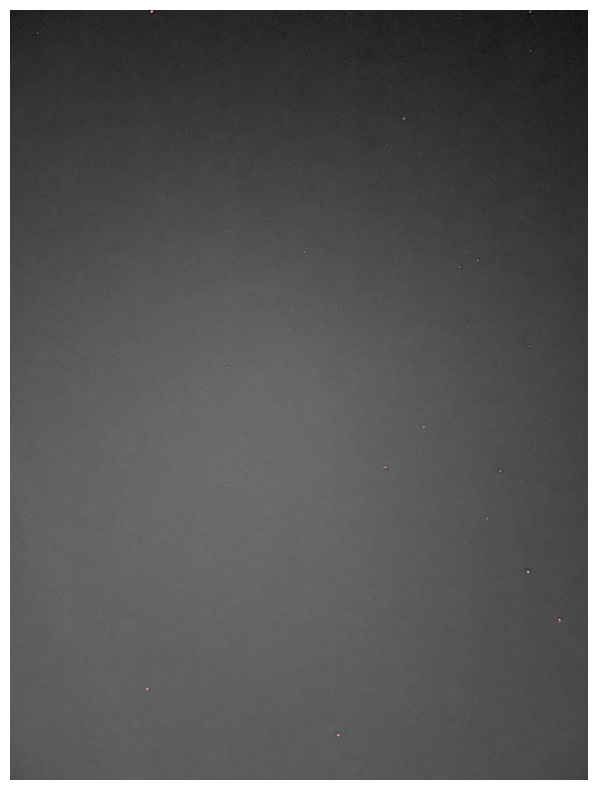

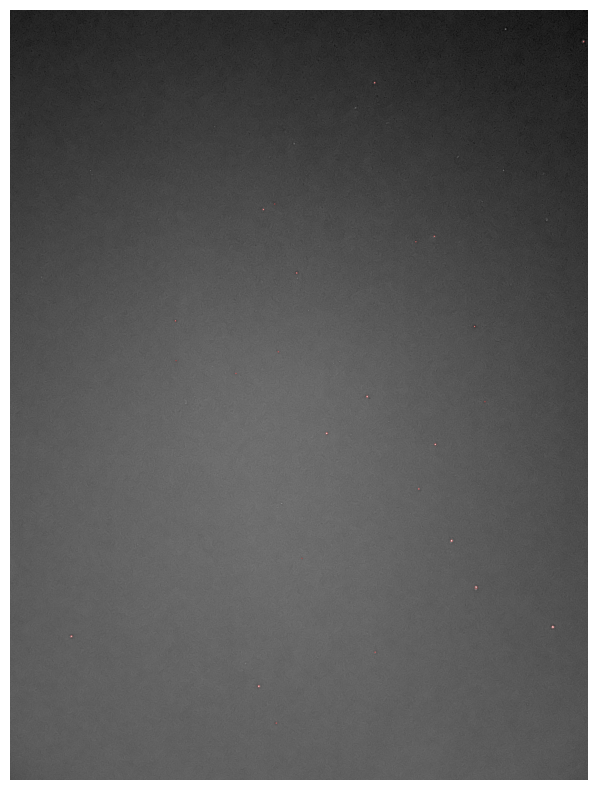

In [6]:
im1_with_keypoints = cv2.drawKeypoints(im1, keypoints1, np.array([]),
                                       (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(im1_with_keypoints)
plt.axis('off')
plt.show()

im2_with_keypoints = cv2.drawKeypoints(im2, keypoints2, np.array([]),
                                       (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(im2_with_keypoints)
plt.axis('off')
plt.show()

In [7]:
im2_data = get_blobs_data(im2, keypoints2)
im1_data = get_blobs_data(im1, keypoints1)
# Convert keypoints to a list of points
points1 = [pt for pt in im1_data[:, :2]]
points2 = [pt for pt in im2_data[:, :2]]

# estimate line model from keypoints
line1, inliers1 = estimate_line(points1)
line2, inliers2 = estimate_line(points2)

In [8]:
points1 = np.array(inliers1)
points2 = np.array(inliers2)
model = estimate_transformation(inliers1, inliers2)

HERE


In [9]:
matched_points = get_star_matches(model, points1, points2)

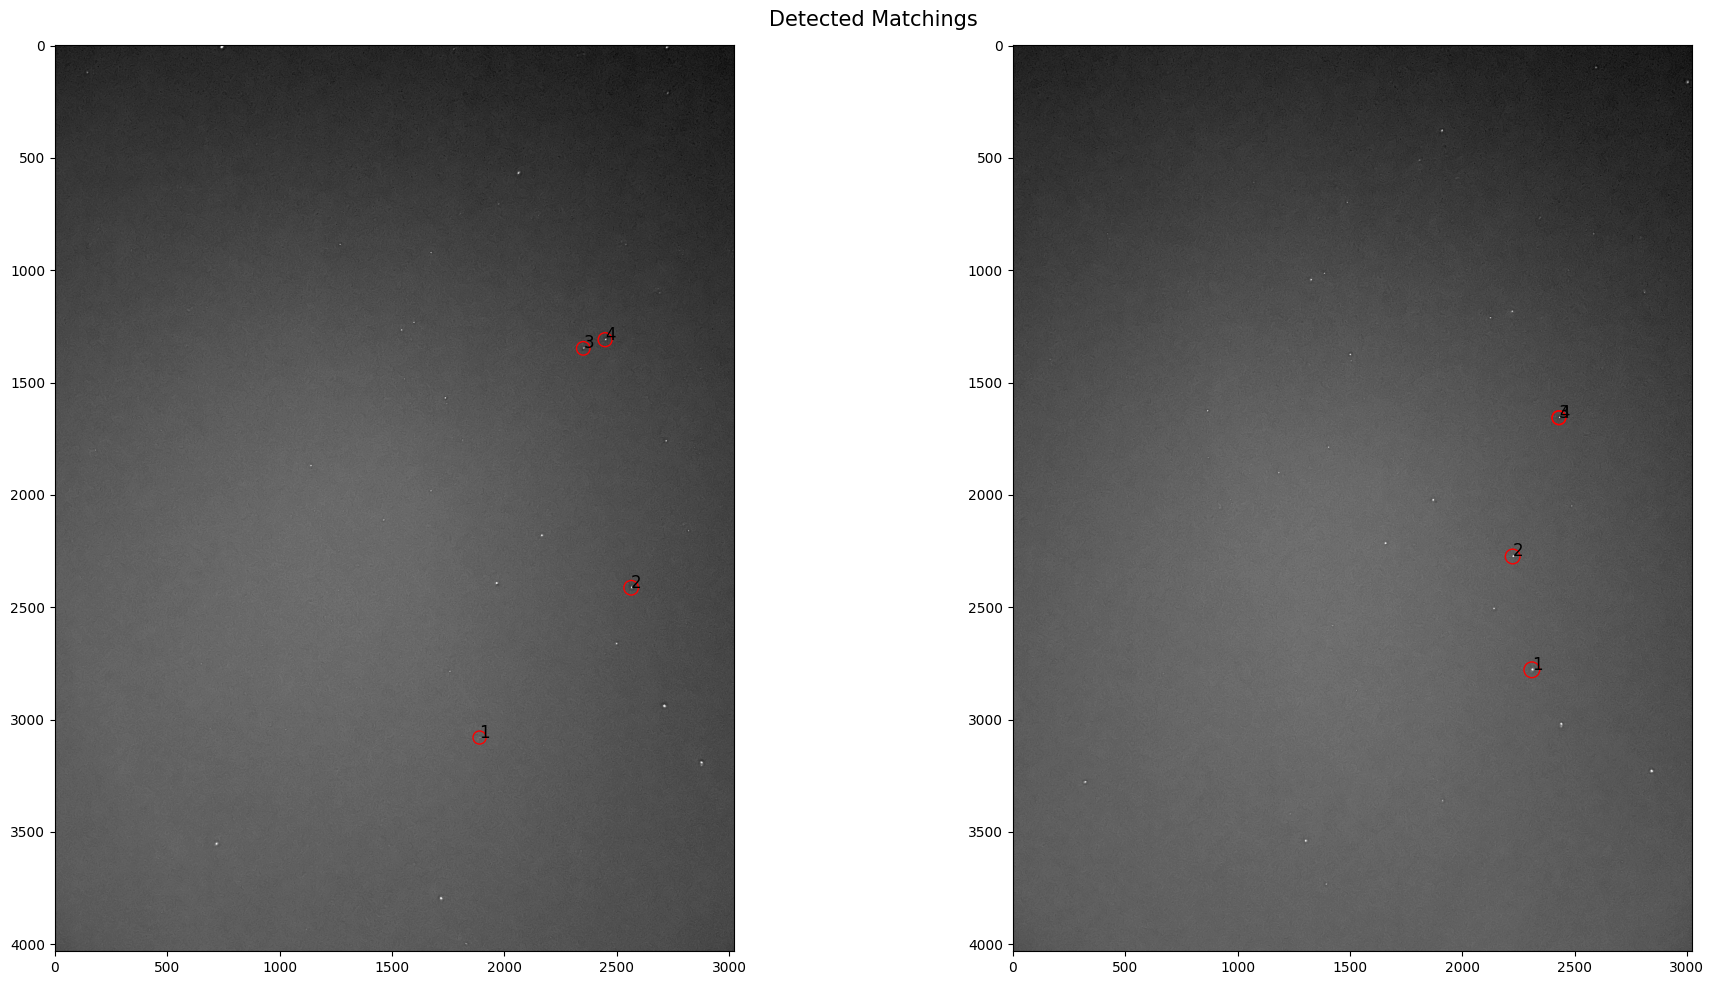

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
fig.suptitle("Detected Matchings", size=15)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap='gray')

for num, (i, j, _) in enumerate(matched_points, 1):
    x1, y1, r1, b1 = im1_data[i]
    ax[0].text(x1, y1, f"{num}", fontsize=12, horizontalalignment='left', verticalalignment='baseline')
    ax[0].add_patch(plt.Circle((x1, y1), radius=r1 + 25, edgecolor='r', facecolor='none'))

    x2, y2, r2, b2 = im2_data[j]
    ax[1].text(x2, y2, f"{num}", fontsize=12, horizontalalignment='left', verticalalignment='baseline')
    ax[1].add_patch(plt.Circle((x2, y2), radius=r2 + 25, edgecolor='r', facecolor='none'))

plt.tight_layout()
plt.show()

In [17]:
# H, mask = cv2.findHomography(sample1, sample2, cv2.RANSAC)
# for p1 in points1:
#     p1_transformed = calculate_transformation(H, p1)
#     if p1_transformed is not None:
#         for j, kp2 in enumerate(keypoints2):
#             p2 = kp2.pt
#             curr_dist = np.linalg.norm(p1_transformed - p2)
#             if curr_dist < dist_thresh:
#                 matched_points.append((i, j, curr_dist))
#
#     matched_points = sorted(matched_points, key=lambda m: m[-1])

In [18]:
# pt11, pt12 = get_line_pts(line1)
# plt.plot((pt11.x, pt12.x), (pt11.y, pt12.y))
# plt.show()